# Exercise 1. Accuracy of classifier model with Keras

**1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten','Embedding', and 'pandas' libraries.**

In [43]:
#!pip install keras tensorflow

In [44]:
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

**2. Define the corpus with the following sentences: This is good pizza, Ilove Italian pizza, The best pizza, nice pizza, Excellent pizza, I lovepizza, The pizza was alright, disgusting pineapple pizza, not goodpizza, bad pizza, very bad pizza, I had better pizza.**

In [45]:
# Define the corpus (list of strings)
corpus = [
    'This is good pizza',
    'I love Italian pizza',
    'The best pizza',
    'nice pizza',
    'Excellent pizza',
    'I love pizza',
    'The pizza was alright',
    'disgusting pineapple pizza',
    'not goodpizza',
    'bad pizza',
    'very bad pizza',
    'I had better pizza'
]

**3. Create class labels for each sentence '1' for positive and '0' fornegative.**

In [46]:
# Define class labels
labels = [
    1,  # 'This is good pizza'
    1,  # 'I love Italian pizza'
    1,  # 'The best pizza'
    1,  # 'nice pizza'
    1,  # 'Excellent pizza'
    1,  # 'I love pizza'
    0,  # 'The pizza was alright'
    0,  # 'disgusting pineapple pizza'
    0,  # 'not good pizza'
    0,  # 'bad pizza'
    0,  # 'very bad pizza'
    0   # 'I had better pizza'
]

**4. Create a data frame with 'text' as corpus and 'sentiment' as labels.**

In [47]:
# Create the DataFrame
df = pd.DataFrame({'text': corpus, 'sentiment': labels})
df.head(12)

,text,sentiment
0,This is good pizza,1
1,I love Italian pizza,1
2,The best pizza,1
3,nice pizza,1
4,Excellent pizza,1
5,I love pizza,1
6,The pizza was alright,0
7,disgusting pineapple pizza,0
8,not goodpizza,0
9,bad pizza,0


**5. Extract the vocabulary from the corpus and encode it.**

In [48]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import one_hot

# Define vocabulary size
vocabulary=set()
for sentence in corpus:
    for word in sentence.split():
        vocabulary.add(word)
vocabulary_size=len(vocabulary)
print("Vocabulary size : ", vocabulary_size)

# Encode the corpus
encoded_corpus = [one_hot(sentence, vocabulary_size) for sentence in corpus]

# Display encoded sentences
print("Encoded Corpus:")
for i, encoded in enumerate(encoded_corpus):
    print(f"{i + 1}: {encoded}")


Vocabulary size :  21
Encoded Corpus:
1: [8, 6, 5, 20]
2: [13, 12, 2, 20]
3: [17, 15, 20]
4: [14, 20]
5: [12, 20]
6: [13, 12, 20]
7: [17, 20, 20, 12]
8: [19, 5, 20]
9: [6, 12]
10: [9, 20]
11: [11, 9, 20]
12: [13, 9, 10, 20]


**6. Pad the document to the maximum length of the longest sentences to have uniform length.**

In [49]:
# Import necessary libraries
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Find the maximum length of the sentences
max_length = max(len(enc) for enc in encoded_corpus)

# Pad the encoded documents to the max length
padded_docs = pad_sequences(encoded_corpus, maxlen=max_length)
padded_docs = padded_docs.astype(np.int64)

# Display the padded encoded sentences
print("Padded Encoded Corpus:")
print(padded_docs)

Padded Encoded Corpus:
[[ 8  6  5 20]
 [13 12  2 20]
 [ 0 17 15 20]
 [ 0  0 14 20]
 [ 0  0 12 20]
 [ 0 13 12 20]
 [17 20 20 12]
 [ 0 19  5 20]
 [ 0  0  6 12]
 [ 0  0  9 20]
 [ 0 11  9 20]
 [13  9 10 20]]


**7. Define the model with Keras with Embedding (None, 5, 8) as outputshape, Flatten (None, 40), and Dense (None, 1).**

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Define vocabulary size and maximum input length (for demonstration purposes)
#vocab_size = 50  # This should be the total unique words in your vocabulary
#max_length = 40  # Max length of input sequences (could be modified as per your data)

# Define the model
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=6, input_length=max_length),  # Embedding layer with output shape (None, 40, 6)
    Flatten(),  # Flatten layer to convert to shape (None, 240)
    Dense(1, activation='sigmoid')  # Dense layer with output shape (None, 1) for binary classification
])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and metrics=['acc'].**

In [51]:
# Import necessary libraries
import numpy as np

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to a NumPy array
labels = np.array(labels)

# Train the model with 50 epochs
history = model.fit(padded_docs, labels, epochs=50, verbose =1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6932
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5833 - loss: 0.6921
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5833 - loss: 0.6910
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6667 - loss: 0.6898
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6667 - loss: 0.6887
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6667 - loss: 0.6876
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6667 - loss: 0.6864
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6667 - loss: 0.6853
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6667 - loss: 0.6842
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6667 - loss: 0.6831
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6819
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.6808
Epo

**9. What are your conclusions about the model?**

In [52]:
'''The model has an Embedding layer that captures word representations,
a Flatten layer to convert embeddings into a 1D array, and a Dense output layer for binary classification.
This simple architecture is suitable for basic text classification tasks'''

'The model has an Embedding layer that captures word representations, a Flatten layer to convert embeddings into a 1D array, and a Dense output layer for binary classification.\nThis simple architecture is suitable for basic text classification tasks'

# Exercise -2

**1. Load nltk, pandas, re, numpy, and matplotlb.**

In [53]:
# Import required libraries
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**2. Use the Tweets.csv file in Google Drive**

In [54]:
data = pd.read_csv('/content/Tweets.csv')

**3. Take a look at the first five rows.**

In [55]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


**4. Plot the shares of airlines mentioned in the data.**

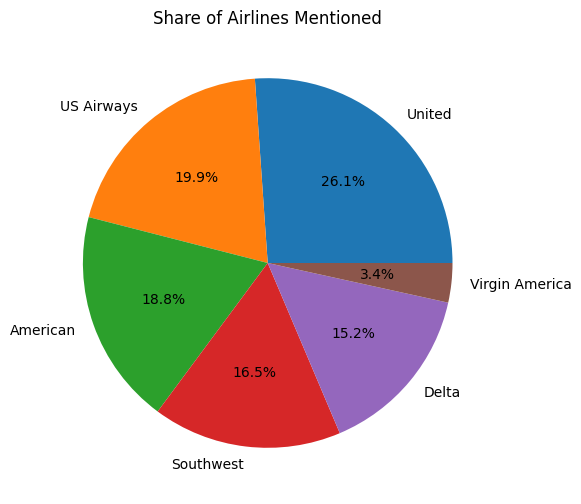

In [56]:
# Plot for the shares of airlines
airline_counts = data['airline'].value_counts()
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Share of Airlines Mentioned")
plt.ylabel("")  # Hide y-axis label for better appearance
plt.show()

**5. Plot the percentage of positive, negative, and neutral sentiments.**

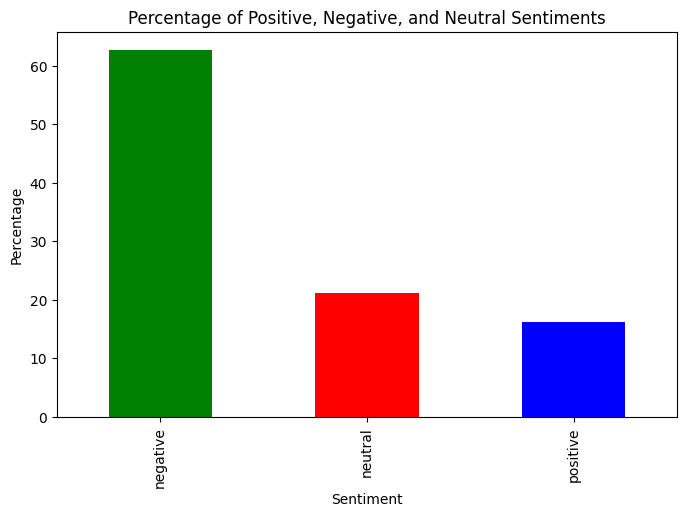

In [57]:
# Plot the sentiment distribution
sentiment_counts = data['airline_sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Percentage of Positive, Negative, and Neutral Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.show()

**6. In a bar chart, show the number of positive, negative, and neutral comments by airline.**

<Figure size 1200x600 with 0 Axes>

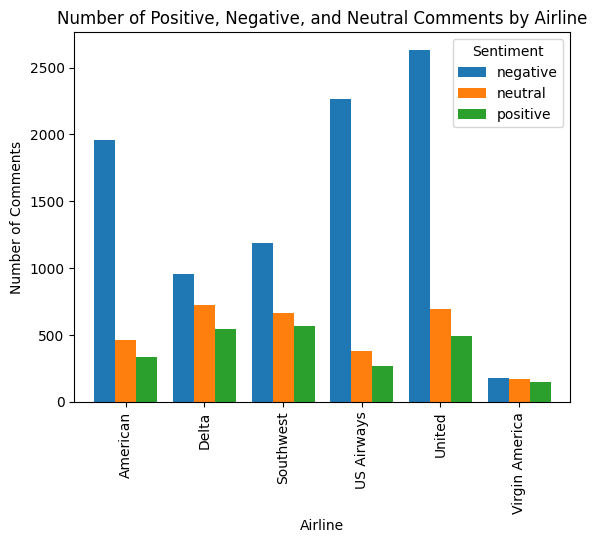

In [58]:
# Group data by airline and sentiment
sentiment_by_airline = data.groupby(['airline', 'airline_sentiment']).size().unstack()

# Plotting three bars in a single plot for each sentiment type
plt.figure(figsize=(12, 6))
sentiment_by_airline.plot(kind='bar', width=0.8)
plt.title("Number of Positive, Negative, and Neutral Comments by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment")
plt.show()

**7. Using Seaborn, show airlines' sentiment confidence.**

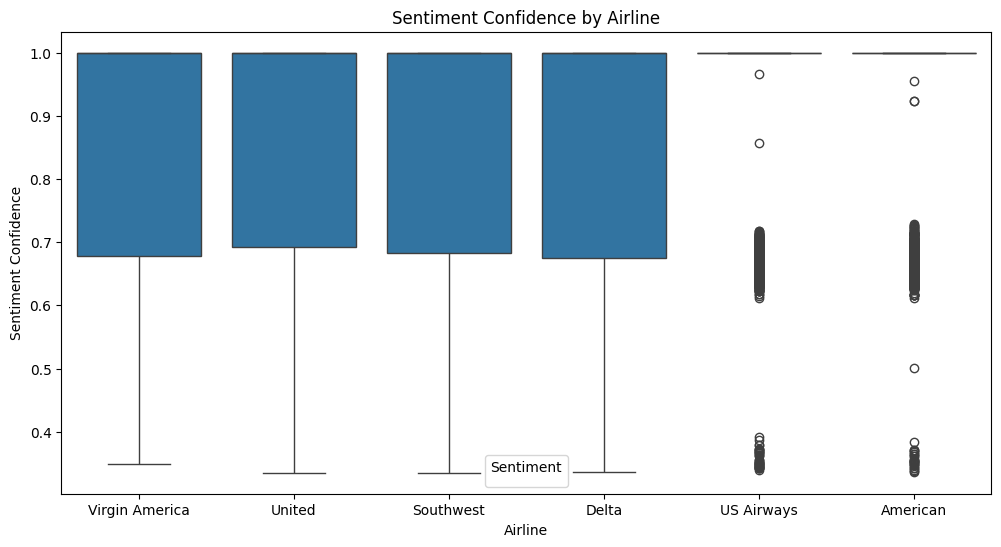

In [59]:
import seaborn as sns

# Seaborn plot for sentiment confidence
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='airline_sentiment_confidence',  data=data)
plt.title("Sentiment Confidence by Airline")
plt.xlabel("Airline")
plt.ylabel("Sentiment Confidence")
plt.legend(title="Sentiment")
plt.show()

**8. Define the features and labels.**

In [60]:
# Define features (tweets) and labels (sentiment)
features = data['text']
labels = data['airline_sentiment']

**9. Clean the tweets.**

In [61]:
from nltk.corpus import stopwords

# Define function to clean tweets
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Lowercase text
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning function
cleaned_tweets = features.apply(clean_text)


**10. Vectorize the tweets.**

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize count vectorizer
vectorizer = CountVectorizer()
features_vectorized = vectorizer.fit_transform(cleaned_tweets)

**11. Create a train and test (20%) dataset.**

In [63]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features_vectorized, labels, test_size=0.2, random_state=17)

**12. Import the RandomClassifier model.**

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
model = RandomForestClassifier()

**13. Define the 'predictions'.**

In [65]:
# Train the model and make predictions
model.fit(X_train, y_train)
predictions = model.predict(X_test)

**14. Generate the confusion matrix, the classification report, and the accuracy score.**

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)

# Accuracy score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1688  113   53]
 [ 264  309   59]
 [ 130   65  247]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1854
     neutral       0.63      0.49      0.55       632
    positive       0.69      0.56      0.62       442

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.68      2928
weighted avg       0.75      0.77      0.76      2928


Accuracy Score: 0.7663934426229508


**15. What is your conclusion?**

In [67]:
'''Random Forest model performs reasonably well in classifying tweet sentiments,
achieving good accuracy and balanced precision and recall across sentiment categories.'''

'Random Forest model performs reasonably well in classifying tweet sentiments, \nachieving good accuracy and balanced precision and recall across sentiment categories.'